In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def add_layer(inputs,in_size,out_size,n_layer,activation_function=None):
    layer_name = "layer%s" % n_layer
    with tf.name_scope('layer'):
        with tf.name_scope('weights'):
            Weights = tf.Variable(tf.random_normal([in_size,out_size],name='w'))
            tf.summary.histogram(layer_name+"/weights",Weights)
        with tf.name_scope('bias'):
            biases = tf.Variable(tf.zeros([1,out_size])+0.1,name='b')
            tf.summary.histogram(layer_name+"/bias",biases)
        Wx_plus_b = tf.matmul(inputs,Weights) + biases
        if(activation_function is None):
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
        tf.summary.histogram(layer_name + '/outputs', outputs)
    return outputs

In [3]:
x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data) -0.5 + noise

In [4]:
with tf.name_scope("inputs"):
    xs = tf.placeholder(tf.float32,[None,1],name="x_input")
    ys = tf.placeholder(tf.float32,[None,1],name="y_input")
l1 = add_layer(xs,1,10,1,tf.nn.relu)
prediction = add_layer(l1,10,1,2)

In [5]:
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),reduction_indices=[1]))  
    tf.summary.scalar("loss",loss)
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

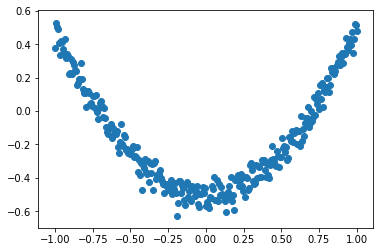

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.ion()
plt.show()

In [7]:
init = tf.global_variables_initializer()
sess = tf.Session()
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter("tensorboard_logs/",sess.graph)
sess.run(init)
for i in range(1000):
    sess.run(train_step,feed_dict={xs: x_data,ys: y_data})
    if i % 10 ==0:
        # try:
        #     ax.lines.remove(lines[0])
        # except Exception:
        #     pass
        # prediction_value = sess.run(prediction,feed_dict={xs: x_data,ys: y_data})  
        # lines = ax.plot(x_data,prediction_value,"r-",lw=5)
        result = sess.run(merged,feed_dict={xs: x_data,ys: y_data})
        writer.add_summary(result,i)